# INVESTIGATION OF THE FORCE – EXTENSION RELATIONSHIP FOR RUBBER

## Theory:
Rubber – an example of a polymer with weak cross bonds. Natural rubber is a polymer of the molecule iso-prene. It has weak van der Waals cross-bonds and only a few covalent (strong) cross-bonds.

## Apparatus:

* Rubber band of cross-section approximately 1mm by 2mm
* Clamp and stand
* G-clamp to secure (if required)
* 50 g mass holder plus a number of 50 g masses
* Optical pin (for use as a pointer if required)
* Metre rule (resolution ± 0.001m)
* Micrometer (resolution ± 0.01mm)

## Experimental Method:

Hang a (cut) rubber band of (approximate) cross-section 1mm by 2mm vertically from a stand, boss and clamp. The base of the stand should be secured using a G-clamp. Hang a 50 gram mass holder from the band. Place a metre rule as close as possible to the mass holder. The length can be read using an optical pin attached to the base of the mass holder.
Measure the length, width and thickness of the rubber when it is supporting the 50 gram holder. Try to avoid squashing the rubber with the micrometer screw gauge.
Increase the mass in 50 gram steps, measuring the extension each time. Continue until the band breaks.
Plot the force - extension curve and determine the Young modulus from the linear section.

## Extension:
A similar experiment could be carried out on polyethene and a comparison of the two curves made. Another investigation could be made comparing the properties of the plastic shopping bags from various supermarkets. Measurements could be taken when unloading both the rubber band and the polyethene and the hysteresis determined.


Polynomial coefficients: [-0.4547619   0.303207    0.16664683 -0.00446243]


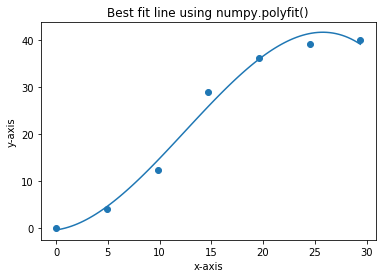

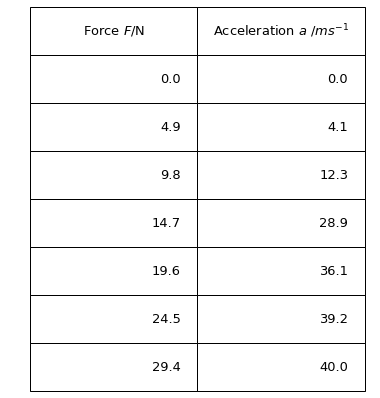

In [8]:
# Importing the necessary libraries
from matplotlib import pyplot as plt
import numpy as np
#from prettytable import PrettyTable

# interpolation function

def ntrp(x,xa,xb,ya,yb): return (x-xa) * (yb-ya) / (xb-xa) + ya

# perform regression

def polyregress(xdata,ydata,degree):
  return np.polynomial.polynomial.polyfit(xdata,ydata,degree)
  
# acquire polynomial result for x argument

def evaluate(x,coeffs):
  y = 0
  m = 1
  for c in coeffs:
    y += c * m
    m *= x
  return y

# declare data and degree
# Preparing the data to be computed and plotted
dt = np.array([
          
    [0.0, 0.0],
    [4.9, 4.1],
    [9.8, 12.3],
    [14.7, 28.9],
    [19.6, 36.1],
    [24.5, 39.2],
    [29.4, 40.0]
])



# Preparing X and y from the given data
X = dt[:, 0]
y = dt[:, 1]

# Calculating parameters (Here, intercept-theta1 and slope-theta0)
# of the line using the numpy.polyfit() function
#theta = np.polyfit(X, y, 30)



coeffs = polyregress(dt[:, 0],dt[:, 1],3)
xplot = []
yplot = []
plotpoints = 100
xmin = min(dt[:, 0])
xmax = max(dt[:, 0])

print(f'Polynomial coefficients: {coeffs}')

for n in range(plotpoints+1):
    x = ntrp(n,0,plotpoints,xmin,xmax)
    y = evaluate(x,coeffs)
    xplot += [x]
    yplot += [y]
    
    

# Plotting the data points and the best fit line
plt.scatter( dt[:, 0],  dt[:, 1])
plt.plot(xplot,yplot)
#plt.plot(X, y_line, 'r')
plt.title('Best fit line using numpy.polyfit()')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

fig, ax = plt.subplots()
table = ax.table(cellText=dt, loc='center', colLabels=('Force $F$/N','Acceleration $a$ $/ms^{-1}$'))
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')


plt.show()

## Conclusion
In comparison, our calculated resistivity is 0.13 Ohm/m vs a databook value of 0.105 Ohm/m  This is well within the expected variance of an A-level practical.
